## **1. CONTEXTE**

L'Agence de l'Environnement et de la Maîtrise de l'Energie (**ADEME**) a récemment lancé un **appel à manifestation d'intérêt** sur les thèmes de la mobilité, de la logistique et des territoires. Son objectif est de solliciter l'initiative privée pour favoriser l'émergence de projets dans lesquels elle trouve un intérêt, sans avoir préalablement exprimé un besoin précis. Les propositions les plus prometteuses seront soutenues financièrement.

**CesiCDP** est une entreprise spécialisée dans les problèmes liés à la mobilité et à l'**optimisation**. En répondant à cet appel, elle espère obtenir de nouveaux marchés et financements. CesiCDP a décidé d'orienter son projet sur l'étude du **problème de tournées de véhicules**.

Il s'agit de déterminer les tournées d'une flotte de véhicules afin de livrer une liste de clients tout en minimisant la distance parcourue. Les applications sont nombreuses et leurs impacts sur l'environnement peuvent être véritablement significatifs.

Afin de retenir toute l'attention de l'ADEME, CesiCDP a décidé d'ajouter des **contraintes supplémentaires** au problème. Désormais, les véhicules ont une capacité de transport limitée et, pour chaque client, une fenêtre de temps est imposée dans laquelle la livraison doit être effectuée.

## **2. PROBLÈME**

Soit $K$ un ensemble de $k$ véhicules et $C$ un ensemble de $n$ clients répartis dans un plan à deux dimensions. Comment livrer chaque client et revenir au point de départ $0$ en parcourant une distance totale minimale ?

**Remarque :** D'après l'inégalité triangulaire, il s'ensuit que chaque client peut être visité une seule et unique fois. En effet, tout détour ne peut qu'allonger la distance totale, et donc toute solution passant deux fois par le même client n'est pas minimale.

Ce problème sera par la suite appelé **VRP** (Vehicle Routing Problem).

Ajoutons à ce problème des contraintes supplémentaires.

**Capacité :** Chaque véhicule a une capacité de transport limitée, notée $Q$ et identique pour tous. Chaque client a une demande spécifique notée $q$, de même unité que $Q$. La somme des demandes livrées par un véhicule ne peut excéder $Q$. La somme totale des demandes ne peut excéder $k\times Q$.

**Fenêtre de temps :** Chaque client a une fenêtre de temps $[a,b]$ tel que le véhicule ne peut commencer à livrer avant $a$ et ne doit pas arriver après $b$. Le temps de trajet est proportionnel à la distance et chaque livraison chez un client nécessite un temps de service spécifique noté $s$. Un véhicule peut attendre afin de livrer un client s'il est trop tôt pour cela. À un temps $t$ donné, tous les clients pour lesquels $b<t$ doivent avoir été livrés.

Cette version enrichie du VRP sera appelé **CVRPTW** (Capacitated Vehicle Routing Problem with Time Window).

## **3. MODÈLE FORMEL**

Maintenant que nous avons posé le problème, il nous est nécessaire de le traduire formellement.

**Remarque :** Le modèle d'optimisation, ou modèle mathématique, avec les variables de décision, les contraintes et la fonction économique, est défini dans la partie *"6.1. Modèle mathématique"* de ce livrable. Il ne s'agit ici que d'une première modélisation pour plus facilement étudier la complexité de notre problème.

Notre point de départ $0$ et notre ensemble de clients $C$ étant répartis dans un **plan** à deux dimensions, il est possible de représenter ces points en **réseau**, dans un **graphe** complet, symétrique et pondéré des distances euclidiennes.


#### **3.1. VRP**

Soit $G=(V,E)$ un graphe complet. L'ensemble des sommets $V$ est défini par $V=\{0 \}\cup C$ et l'ensemble des sommets $E$ est défini par $E=\{(i,j) | i,j\in V, i\neq j\}$. Le nombre de clients $n$ est défini par $n=|V|-1$.

$K$ est l'ensemble des $k$ véhicules, c'est-à-dire que $k=|K|$.

À chaque arête $(i,j)\in E$ est associée une pondération $d_{ij}$ définie par $d_{ij}=\|i-j\|$. Puisque $i\neq j$, il s'ensuit que $d_{ij}>0$. Par ailleurs, l'égalité $\|i-j\|=\|j-i\|$ implique que $d_{ij}=d_{ji} \forall (i,j)\in E$ et donc les distances sont symétriques.

$G$ étant complet et symétriquement pondéré, il est non orienté.

Le problème **VRP** revient à déterminer $k$ chemins fermés partant de $0$ et visitant chacun un sous-ensemble disjoint $\subseteq C$, tels que chaque client soit visité exactement une fois et que la somme des distances totales des chemins soit minimale.

Soit un véhicule $r\in K$, nous notons $C_{r}$ l'ensemble disjoint des clients qu'il visite. En posant des variables binaires $x_{ij}^{r} \in \{0,1\}$ avec $x_{ij}^{r}=1$ si et seulement si $(i,j)\in C_{r}$, le VRP consiste à résoudre $min_{x}\sum_{k\in K}\sum_{(i,j)\in E}d_{ij}x_{ij}^{r}$.

#### **3.2. CVRPTW**

Modélisons désormais les contraintes supplémentaires du **CVRPTW**.

Soit $Q$ la capacité maximale des véhicules. À chaque client $i\in C$ est associée une demande $q_{i}\geq 0$. Soit $r\in K$ un véhicule, la somme des demandes $q_{i} \forall i\in C_{r}$ ne doit pas dépasser $Q$, c'est-à-dire que la condition $\sum_{i\in C_{r}} q_{i}\leq Q \forall r \in K$ doit être vérifiée.

À chaque client $i\in C$ est associée une fenêtre de temps $[a_{i},b_{i}]$ tel que $0\leq a_{i}\leq b_{i}$ et un temps de livraison $s_{i}\geq 0$. À un temps $t$ donné, aucun client $i$ tel que $t<a_{i}$ ne peut être visité et tous les clients pour lesquels $b_{i}<t$ doivent avoir été visités.

Les véhicules commencent tous leur chemin à un temps $t_{0}=0$ au point $0$. Le temps de trajet est proportionnel $1:1$ à la distance. Un véhicule à la possibilité d'attendre sur place afin de livrer un client dans sa fenêtre de temps. Soit $i,j\in V$ avec $i\neq j$, un véhicule arrivant à $i$ au temps $t_{i}$ arrivera à $j$ au temps $t_{j}=max(a_{j}, t_{i}+s_{i}+d_{ij})$.

## **4. COMPLEXITÉ**

Maintenant que nous avons modélisé formellement notre problème, une question cruciale se pose : peut-on le résoudre efficacement ? Dans le but de proposer une méthode de résolution adaptée, il nous est essentiel de d'abord déterminer la [classe de complexité¹](#1) du problème. Nous cherchons notamment à établir si le problème appartient à P, à NP ou à NP-difficile , car cela conditionne la faisabilité d'une résolution exacte et la possibilité de vérifier efficacement l'exactitude d'une solution.

Afin de lier toutes ses classes de complexité, on peut les représenter dans le [diagramme d'Euler pour les problèmes NP-complets²](#2) :

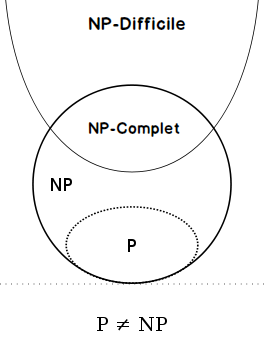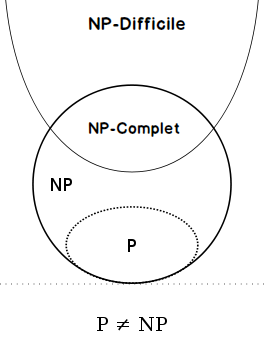

La [méthodologie standard³](#3) consiste à étudier la **NP-complétude** de notre problème. La classe NP-complet est définie pour les problèmes de décision par NP $\cap$ NP-difficile. La preuve de NP-complétude s'effectue donc en modélisant le problème d'optimisation en sa version décisionnelle puis en prouvant que cette dernière appartient à la fois à NP et à NP-difficile.

Si le problème de décision est NP-complet, le problème d'optimisation associé est au moins NP-difficile, puisqu'un algorithme polynomial d'optimisation permettrait de résoudre la décision en comparant la valeur optimale à un seuil donné.

#### **4.1. PROBLÈME DE DÉCISION**

En reprenant le modèle ci-dessus, existe-t-il $k$ chemins fermés partant de $0$ et visistant chacun un sous-ensemble disjoint $\subseteq C$, tels que, chaque client soit visité exactement une fois et la somme des distances des chemins ne dépasse pas un seuil $T$ ? En ajoutant les contraintes du CVRPTW, existe-t-il de tels chemins tels que la sommes des demandes des clients par chemin ne dépasse pas $Q$ et les fenêtres de temps soient respectées pour chaque client ?

Pour des questions de lisibilité, nous appelerons tout de même ces problèmes VRP et CVRPTW bien qu'il s'agira tout au long de l'étude des versions décisionnelles.

#### **4.2. PROBLÈME $\in$ NP**

Notre problème appartient à NP s'il existe un algorithme qui permet de **vérifier** en temps polynomial un **certificat**, c'est-à-dire vérifier si une solution donnée est valide. Si un tel algorithme n'existe pas ou que sa complexité n'est pas polynomiale, notre problème n'est pas NP. Avant d'essayer d'en écrire un, rapellons d'abord la forme des solutions.

**4.2.1 Solutions valides**

Une solution candidate $S$ du CVRPTW prend la forme d'un ensemble de $k$ tournées, chacune spéficiant une suite ordonnée de clients visités et un temps d'arrivée pour chaque client visité. Pour qu'une solution soit admise, elle doit respecter l'intégralité des **contraintes** du problème. 

Notons $R$ une tournée d'un véhicule $r\in K$. On note $R_{i}$ le i-ème point de la tournée. Les contraintes sont :

**a.** Toutes les tournées débutent et se terminent au point $0$, c'est-à-dire que $R_{0} = R_{n+1} = 0$.

**b.** Chaque client est visité une seule et unique fois, c'est-à-dire que chaque tournée $R$ d'un véhicule $r$ doit strictement contenir $0$ et le sous-ensemble $C_{r}\subseteq C$ tel que pour tout $r\in K$ et $r\neq r'$, on a $C_{r}\cap C_{r'}=\emptyset$ et $\bigcup_{r\in K} C_{r} = C$.

**c.** La somme des demandes des clients visités par une tournée ne dépasse pas $Q$, c'est-à-dire que pour chaque tournée $R$, on a $\sum_{i\in C_{r}} q_{i}\leq Q$.

**d.** Tous les clients sont visités à temps, c'est-à-dire qu'à tout temps $t$, tous les clients pour lesquels $b_{i}<t$ doivent avoir été visités.

**4.2.2 Algorithme de certificat**

La vérification s'effectue en 4 étapes, chacunes composées de plusieurs opérations.

**a.** La tournée débute et se termine au point $0$.

- Pour chaque tournée, vérifier que le premier et le dernier élément est $0$.

Cette étape effectue deux opérations $O(1)$ pour chaque tournée, et dépend donc linéairement du nombre de tournées. Son coût est $O(k)$.

**b.** Chaque client est visité une seule et unique fois.

- Associer à chaque client de $C$ un identifiant entier de 1 à n. Notons cet identifiant `ic`.
- Initialiser un tableau `visited[n]` avec chaque élement à `false`.
- Pour chaque client $c$ dans les tournées, si `visited[ic]=True`, rejeter la solution, sinon assigner `visited[ic]==True`.

Les deux premières opérations ont un coût $O(n)$. La troisième effectue une à deux opérations $O(1)$ pour chaque client de chaque tournée et a donc un coût $O(m)$, avec $m=\sum_{i=1}^{k}(|R_{i}|-2)$. Cette étape, qu'elle soit $O(n)$ ou $O(m)$, est réalisable en temps polynomial.

**Remarque :** On retire 2 au nombre d'éléments dans une tournée pour obtenir le nombre de clients qu'elle contient, puisque l'on ne compte pas le point $0$ présent deux fois.

**c.** Les capacités de transport sont respectées.

- Pour chaque tournée $R$, calculer $\sum_{i\in C_{r}} q_{i}\leq Q$ et vérifier que cette somme ne dépasse pas $Q$.

Le calcul et la vérification sont constants et il faut effectuer ces calculs pour chaque tournée, le coût total est O(k).

**d.** Les clients sont visités à l'heure.

- Pour chaque tournée $R_{i}$:
  - Initialiser le temps courant $t_{actuel}=0$.
  - Pour chaque transition du client $j$ au client $j+1$,
    - Calculer le temps d'arrivée chez le client suivant : $t_{arrivée}=t_{actuel}+s_{j}+d_{j(j+1)}$.
    - Vérifier la fenêtre de temps du client suivant : $a_{j+1}\leq t_{arrivée} \leq b_{j+1}$. Si cette condition n'est pas respectée, rejeter la solution.
    - Assigner $t_{actuel}=t_{arrivée}$

Encore une fois, cette étape est linéaire car elle consiste en plusieurs opérations O(1) pour chaque client de chaque tournée.

**4.2.3 Conclusion**

Chacune des étapes étant réalisable en temps polynomial et étant indépendante, notre algorithme de certificat peut vérifier une solution en temps polynomial. Notre problème est donc NP.

#### **4.3. PROBLÈME $\in$ NP-DIFFICILE**

Notre problème appartient à NP-difficile s'il est au moins autant difficile qu'un problème NP-complet connu. Pour cela, il faut montrer que l'on peut réduire ce problème à notre problème en temps polynomial.

Le problème de décision du **voyageur de commerce** (TSP) questionne l'existence d'un chemin fermé dans un graphe complet, symétrique et pondéré par des distances, tel que chaque sommet soit visité exactement une fois et la somme des distances du chemin ne dépasse pas un seuil $T$. Ce problème a été [prouvé NP-complet⁴](#4) par réduction du problème du cycle hamiltonien (HCP $\leq_{p}$ TSP). Nous le choississons pour démontrer que notre CVRPTW est NP-difficile (TSP $\leq_{p}$ CVRPTW).

Maintenant notre problème choisi, nous devons montrer qu'une **réduction** est possible en temps polynomial. Pour cela, nous devons d'abord montrer qu'il est possible de construire en temps polynomial une instance du CVRPTW à partir d'une instance du TSP, puis que les deux instances sont équivalentes. Afin de simplifier la réduction de CVRPTW, nous allons réaliser une première réduction, de TSP vers VRP, puis une deuxième, de VRP vers CVRPTW.

**4.3.1. Partie 1 : (TSP $\leq_{p}$ VRP)**

Soit $I_{TSP}$ une instance du TSP donnée par $G=(V,E)$ et par des distances $d_{ij}$ pour chaque arête $(i,j)\in E$. Nous déclarons un ensemble $K$ de $k$ véhicules tel que $k=1$. Nous déclarons arbitrairement un sommet de $V$ comme $0$. Nous déclarons $C$ tel que $C=V\setminus 0$. Le coût des deux premières opérations est $O(1)$ et le coût de la troisième est $O(n)$. Nous obtenons une instance $I_{VRP}$ du VRP en temps $O(n)$.

Si $I_{TSP}$ admet un cycle hamiltonien de coût $\leq T$, alors considérer ce cycle comme la tournée du véhicule $K_{1}$ donne une solution de $I_{VRP}$ de coût $\leq T$. Réciproquement, si $I_{VRP}$ admet un cycle de coût $\leq T$, alors cette tournée est précisémment un cycle hamiltonien de $G$ de coût $\leq T$ puisque $k=1$. Ainsi, $I_{TSP}$ a une solution si et seulement si $I_{VRP}$, et vice-versa.

**4.3.2. Partie 2 : (VRP $\leq_{p}$ CVRPTW)**

Soit $I_{VRP}$ une instance du VRP donnée par $G=(V,E)$ avec $k$ véhicules et $n$ clients. Nous associons à chaque client $i$ une demande $q_{i}=1$. Nous déclarons une capacité $Q=n$ pour tous les véhicules tel qu'il soit possible pour un véhicule de livrer tous les clients. Nous associons à chaque client un temps de service $s_{i}=0$ et une fenêtre de temps $[0, Σd_{ij}] \forall (i,j) \in E$. La déclaration de $Q$ se fait en $O(1)$ tandis que les associations coûtent $O(n)$. Nous obtenons une instance $I_{CVRPTW}$ du CVRPTW en temps $O(n)$.

Si $I_{VRP}$ admet $k$ chemins fermés de coût $\leq T$, alors les considérer comme solution de $I_{CVRPTW}$ de coût $\leq T$ est valide puisque tous les camions ont la capacité de livrer tous les clients et les clients peuvent être livrés à toute heure. Réciproquement, si $I_{CVRPTW}$ admet une solution, elle est valide pour $I_{VRP}$ puisque le problème VRP n'inclus pas ces contraintes.

**4.3.3. Conclusion : (TSP $\leq_{p}$ CVRPTW)**

Le problème de décision TSP se réduit vers le problème de décision du CVRPTW, puisqu'il se réduit vers le VRP qui se réduit lui même vers le CVRPTW. Ce dernier est donc au moins aussi difficile que le TSP, et est donc **NP-difficile** puique le TSP est lui même NP-difficile.

#### **4.4. CONCLUSION**

Le CVRPTW décisionnel appartient à la fois à NP, car il existe un algorithme de certificat en temps polynomial, et à NP-difficile, car il est au moins aussi difficile que le TSP, lui même NP-difficile. Par conséquent, il s'agit d'un problème NP-complet.

Le CVRPTW d'optimisation est donc NP-difficile puisque résoudre une instance du CVRPTW en trouvant une solution optimale $S$ revient à résoudre une instance similaire du CVRPTW décisionnel pur lequel $T$=$S$.

## **5. RÉSOLUTION**

La **recherche opérationnelle** fournit les outils mathématiques pour modéliser et résoudre des problèmes complexes.

Nous allons dans un premier temps apporter une résolution par **méthodes exactes**, grâce à la programmation linéaire en nombre entiers (PLNE). Cependant, nous savons déjà que cette résolution ne peut pas se faire en temps polynimal puisque notre problème est **NP-difficile**. Cela implique que ces méthodes seront applicables que pour des petites instances.

Ces travaux nous servirons de base pour ensuite aborder les **méta-heuristiques**, méthodes qui produiront une solution sous-optimale mais en temps raisonnable, en implémentant des mécanismes d'exploration et d'exploitation.

## **6. MÉTHODES EXACTES**

Avant de proposer une résolution, nous devons modéliser notre problème d'optimisation CVRPTW sous forme d'un modèle mathématique, ou modèle d'optimisation. Guidée par les méthodes de la recherche opérationnelle, cette modélisation comprend :
- les **variables de décision** : inconnues du problème, leviers qui influencent le résultat
- les **contraintes**, des limites qui restreignent l’espace de recherche, c’est-à-dire l’espace possible des variables de décision ou encore l’espace des solutions admissibles
- la **fonction objectif** (ou fonction économique), qui est une mesure de la performance à optimiser

#### **6.1. MODÈLE MATHÉMATIQUE**

Voici un récapitulatif de ce que vous trouverez plus en détails juste en dessous :

Nous définissons notre fonction économique du **VRP** exactement comme nous avons modélisé notre objectif plus haut :

$f=\sum_{r\in K}\sum_{(i,j)\in E}d_{ij}x_{ij}^{r}$  avec  $x_{ij}^{r}\in\{0,1\}$ | $x_{ij}^{r}=1\iff i,j\in C_{r}$

Notre variable de décision est $x$ et nous cherchons à minimiser $f$ en fonction de $x$. On note $\underset{x}{min} f$. Nous remarquons déjà que notre fonction est linéaire. Voici nos contraintes :

- Contrainte d'unique visite
  - Un client ne peut être livré qu'une seule fois. On fait donc la somme des passages en entrée du client :
  $$
  \sum_{k \in K} \sum_{i \in V, i \neq j} x_{ijk} = 1 \qquad \forall j \in C
  $$

- Contrainte de continuité de route
  - Si un véhicule arrive chez un client, il doit repartir de chez ce même client. Le nombre de passage doit donc être le même en entrée et sortie d'un client.
  $$
  \sum_{i \in V, i \neq h} x_{ihk} = \sum_{j \in V, j \neq h} x_{hjk} \qquad \forall h \in C, \forall k \in K
  $$

- Contrainte de dépôt
  - La tournée commence au dépôt $0$.
  $$
  \sum_{j \in C} x_{0jk} <= 1 \qquad \forall k \in K
  $$
  - La tournée se termine au dépôt $0$.
  $$
  \sum_{i \in C} x_{i0k} <= 1 \qquad \forall k \in K
  $$
  - Si un véhicule part du dépôt, il doit revenir à ce même dépôt.
  $$
  \sum_{j \in C} x_{0jk} == \sum_{i \in C} x_{i0k}$$

- Contrainte d'élimination des sous-tours

  $$u_{jk} \geq u_{ik} + q_j - Q_k (1 - x{ijk}) \qquad \forall i \in C, \forall j \in C, i \neq j, \forall k \in K
  $$

  - Contrainte de continuité temporelle
  $$
  t_{jk} \geq t_{ik} + s_i + d_{ij} - M(1 - x_{ijk}) \qquad \forall i, j \in V, i \neq j, \forall k \in K
  $$

- Contrainte de domaine de la variable de décision binaire
$$
x_{ijk} \in \{0, 1\}
$$

- Contrainte de domaine de la variable de rang de visite
$$
0 \leq u_{ik} \leq Q_k \qquad \forall i \in C, \forall k \in K
$$

- Contrainte de non-négativité des variables de temps
$$
t_i \geq 0
$$

Le **CVRPTW** n'ajoute que des contraintes au problème. Il s'agit toujours de minimiser $f$. Voici les contraintes supplémentaires :

- Contrainte de capacité du véhicule
  $$
  \sum_{i \in C} q_i (\sum_{j \in V, j \neq i} x_{ijk}) \leq Q \qquad \forall k \in K
  $$
  - Contrainte de continuité temporelle
  $$
  t_{jk} \geq t_{ik} + s_i + d_{ij} - M(1 - x_{ijk}) \qquad \forall i, j \in V, i \neq j, \forall k \in K
  $$

## OPTIMISATION LINÉAIRE

Afin de définir mathématiquement et sans ambiguïté l'ensemble de toutes les solutions réalisables (l'espace de recherche), nous devons définir la PLNE (Programmation Linéaire en Nombres Entiers).

Toute solution trouvée (que ce soit par une méthode exacte ou une métaheuristique) doit respecter ces contraintes. Si le PLNE est infaisable, c'est que le problème n'a pas de solution.

La [programmation linéaire en nombres entiers⁵](#5) est un domaine des mathématiques et de l'informatique théorique dans lequel on considère des problèmes d'optimisation d'une forme particulière. Ces problèmes sont décrits par une fonction de coût et des contraintes linéaires, et par des variables entières.

#### DONNÉES

Afin de définir la PLNE de notre CVRPTW (Capacited Vehicle Routing Problem with Time Windows), nous allons commencer par intégrer une nomenclature des différentes données qui composent notre problème :

| Symbole | Description |
|-|-|
| $V$ | Ensemble des sommets V = $\{0,...,V\}$ avec le dépôt $0$ |
| $C$ | Ensemble des clients $C = V \setminus \{0\}$ soit $C = \{1,...,n\}$ |
| $E$ | Ensembles des arrêtes $E = \{(i, j) \mid i, j \in V, i \neq j\}$ |
| $K$ | Ensemble des véhicules $K = \{1,...,K\}$ |
| $i, j$ | Index des sommets $i$, $j \in V$ |
| $k$ | Index des véhicules $k \in K$ | 
| $d_{ij}$ | Coût/Distance de $i$ à $j$ |
| $q_i$ | Demande du client $i$ ($q_0 = 0$) |
| $Q$ | Capacité maximale de chaque véhicule |
| $[a,b]$ | Fenêtre de temps de service pour un client $i$ |
| $s_i$ | Temps de service pour un client $i$ ($s_0 = 0$) |
| $M$ | Constante Big-M $M = b_{max} V + d_{ij \text{ } max} + s_{max} + 1$ |
| $x_{ijk}$ | Binaire : $1$ si le véhicule $k$ va de $i$ à $j$, $0$ sinon |
| $t_i$ | Temps d'arrivée du véhicule chez le client $i$ |

#### FONCTION OBJECTIF

La [fonction objectif⁶](#6) est utilisée en optimisation mathématique et en recherche opérationnelle pour désigner une fonction qui sert de critère pour déterminer la meilleure solution à un problème d'optimisation. Elle associe une valeur à une instance d'un problème d'optimisation. Le but du problème d'optimisation est alors de minimiser ou de maximiser cette fonction jusqu'à l'optimum, par différents procédés.

Dans le cas de notre optimisation, on cherche à minimiser la distance totale parcourue pour livrer tous les clients.

On peut représenter cet objectif par la fonction objectif suivante :
$$
\text{Min } F = \sum_{k \in K} \sum_{i \in V} \sum_{j \in V, i \neq j} d_{ij} x_{ijk}
$$

#### CONTRAINTES

En mathématiques, une [contrainte⁷](#7) est une condition que doit satisfaire la solution d'un problème d'optimisation. On distingue deux types de contraintes : les contraintes d'égalité et les contraintes en inégalité. L'ensemble des solutions satisfaisant toutes les contraintes est appelé l'ensemble admissible.

Pour trouver l'ensemble admissible dans le cadre de notre problème, nous devons définir les contraintes suivantes :

- Contrainte d'unique visite
  - Un client ne peut être livré qu'une seule fois. On fait donc la somme des passages en entrée du client :
  $$
  \sum_{k \in K} \sum_{i \in V, i \neq j} x_{ijk} = 1 \qquad \forall j \in C
  $$

- Contrainte de continuité de route
  - Si un véhicule arrive chez un client, il doit repartir de chez ce même client. Le nombre de passage doit donc être le même en entrée et sortie d'un client.
  $$
  \sum_{i \in V, i \neq h} x_{ihk} = \sum_{j \in V, j \neq h} x_{hjk} \qquad \forall h \in C, \forall k \in K
  $$

- Contrainte de dépôt
  - La tournée commence au dépôt $0$.
  $$
  \sum_{j \in C} x_{0jk} <= 1 \qquad \forall k \in K
  $$
  - La tournée se termine au dépôt $0$.
  $$
  \sum_{i \in C} x_{i0k} <= 1 \qquad \forall k \in K
  $$
  - Si un véhicule part du dépôt, il doit revenir à ce même dépôt.
  $$
  \sum_{j \in C} x_{0jk} == \sum_{i \in C} x_{i0k}
  $$

- Contrainte de capacité du véhicule
  - Les demandes de clients traitées par un véhicule ne doivent pas dépasser la capacité de ce véhicule.
  $$
  \sum_{i \in C} q_i (\sum_{j \in V, j \neq i} x_{ijk}) \leq Q \qquad \forall k \in K
  $$

- Contrainte d'élimination des sous-tours
  - Les sous-tours ne passant pas par le dépôt $0$ sont éliminés en vérifiant que pour chaque client, la capacité restante du véhicule est suffisante pour satisfaire la demande du client suivant. Si ce n'est pas le cas, $Q_k$ rend la contrainte inactive.
  $$
  u_{jk} \geq u_{ik} + q_j - Q_k (1 - x{ijk}) \qquad \forall i \in C, \forall j \in C, i \neq j, \forall k \in K
  $$

- Charge au premier client
  - La charge prévue pour le premier client est initialisée à la valeur de sa demande.
  $$
  u_{jk} \leq q_j + M * (1 - x_{0jk}) \qquad \forall j \in C, \forall k \in K
  $$
  $$
  u_{jk} \geq q_j - M * (1 - x_{0jk}) \qquad \forall j \in C, \forall k \in K
  $$

- Contrainte de continuité temporelle
  - Le temps d'arrivée d'un véhicule chez un client $j$ peut être calculé en utilisant le temps d'arrivée du client précédent, $i$, le temps de service de ce même client, la distance parcourue pour aller du client $i$ au client $j$ qui admet un rapport 1:1 avec le temps prit lors ce trajet et le temps d'attente possible pour permettre la livraison dans le cas où le véhicule arrive en avance.
  $$
  t_{jk} \geq t_{ik} + s_i + d_{ij} - M(1 - x_{ijk}) \qquad \forall i, j \in V, i \neq j, \forall k \in K
  $$

  Ici on utilise une grande constante M permettant de rendre inactive cette contrainte dans les cas où $x_{ijk}$ est à $0$ afin de ne pas avoir plusieurs valeurs de t_j dans le même temps.

- Contrainte de fenêtre de temps
  - La livraison d'un client ne peut être effectuée que durant une fenêtre de temps. Cela veut dire qu'un véhicule ne peut pas livrer un client avant l'horaire de début de service et ne peut plus le livrer après l'horaire de fin de service.
  $$
  a_i \leq t_i \leq b_i \qquad \forall i \in V
  $$

- Contrainte de domaine de la variable de décision binaire
$$
x_{ijk} \in \{0, 1\}
$$

- Contrainte de domaine de la variable de rang de visite
$$
0 \leq u_{ik} \leq Q_k \qquad \forall i \in C, \forall k \in K
$$

- Contrainte de non-négativité des variables de temps
$$
t_i \geq 0
$$

Cette formulation s'inspire du modèle mathématique du [CVRPTW de Fauzi et al.⁸](#8).

### **7.MÉTA-HEURISTIQUES**

### 7.1. POURQUOI LES MÉTA-HEURISTIQUES ?

À ce stade, nous disposons d'une formulation PLNE complète du CVRPTW.<br>
Cette modélisation mathématique définit rigoureusement l'espace des solutions admissibles :

Toute solution respectant ces contraintes est valide, et inversement. <br>
Un solveur exact de programmation linéaire en nombres entiers, tel que CPLEX, Gurobi ou SCIP, peut en théorie résoudre cette formulation pour obtenir la solution optimale.<br>


Cependant, rappelons le résultat établi en section 4 : le CVRPTW est NP-difficile.


Cela signifie qu'aucun algorithme polynomial n'est connu pour résoudre ce problème dans le cas général. <br>
Les solveurs exacts, bien qu'efficaces sur certaines instances, exhibent une croissance exponentielle <br>
du temps de calcul en fonction de la taille du problème.<br>


En pratique, cette complexité se traduit par des temps de calcul prohibitifs dès que le nombre de clients dépasse quelques dizaines. <br> 
Une instance à 50 clients peut nécessiter plusieurs heures de calcul avec un solveur commercial. <br>
Une instance à 100 clients peut devenir insoluble en temps raisonnable, nécessitant plusieurs jours voire semaines. <br>
Pour 1000 clients,le temps de calcul devient astronomique.<br>

Face à ce constat, les méthodes exactes deviennent impraticables pour des applications industrielles réelles. <br>
Une approche alternative s'impose : 

plutôt que de chercher la solution optimale (et d'y consacrer un temps excessif), on accepte de trouver <br>
une solution de haute qualité en temps raisonnable. C'est précisément le rôle des [métaheuristiques⁹](#9).<br>

Dans un contexte opérationnel, une solution à 3-5% de l'optimum calculée en quelques minutes <br>
est généralement préférable à la solution optimale calculée en plusieurs jours — d'autant que <br>
les données réelles (demandes, trafic) auront probablement évolué entre-temps.<br>


### 7.2. HEURISTIQUES VS MÉTA-HEURISTIQUE

Une **heuristique "simple"** est un algorithme d'optimisation approchée qui explore l'espace de recherche en se concentrant sur l'amélioration locale d'une solution. <br>
La recherche locale classique en est l'exemple parfait : on part d'une solution, on explore son voisinage, on adopte une meilleure solution si elle existe, et on recommence. 

C'est un processus d'**intensification** (ou d'exploitation si vous préférez) : on creuse dans une région prometteuse pour trouver le meilleur optimum local accessible.


Le problème ? Une fois coincé dans un optimum local, l'heuristique s'arrête. <br>
Elle ne peut pas s'en échapper car elle n'accepte jamais de dégradation.<br>
C'est comme si tu escaladais une colline dans le brouillard : tu atteins le sommet de cette colline, mais tu ne sais pas s'il existe une montagne plus haute ailleurs.

Une **méta-heuristique** est un cadre algorithmique de plus haut niveau qui orchestre une ou plusieurs heuristiques en ajoutant des mécanismes de diversification (exploration). <br>
**La diversification** permet d'échapper aux optima locaux et d'explorer de nouvelles régions de l'espace de recherche. <br>
**L'équilibre** entre intensification et diversification est le cœur de toute méta-heuristique efficace : trop d'intensification et on reste bloqué localement, trop de diversification et on n'exploite jamais les bonnes zones trouvées.

### 7.3. GRANDES FAMILLES D'APPROCHES

Bref, c'est bien joli, mais les méta-heuristiques, ce n'est pas un truc monolithique. Il y a plusieurs écoles de pensée, plusieurs "philosophies" des résolution.<br>
Comprendre ces familles nous aidera à choisir les bonnes armes pour notre problème.

#### 7.3.1. Méta-heuristiques à trajectoire

*Ces méthodes font évoluer une **solution unique** au fil des itérations. La trajectoire est la séquence de solutions visitées. Elles partent toutes d'une recherche locale (intensification) à laquelle elles ajoutent un mécanisme spécifique de diversification.*


**Le Recuit Simulé** ([Simulated Annealing / SA¹⁰](#10)) ajoute de la diversification via l'acceptation probabiliste de solutions dégradantes. <br>
À chaque itération, si un voisin est meilleur, on l'accepte (intensification). Sinon, on l'accepte quand même avec une probabilité $p = e^{-\Delta/T}$ où $\Delta$ est la dégradation et $T$ la "température". <br>
Au début, $T$ est élevée et on accepte presque tout (forte diversification). Progressivement, $T$ décroît et on devient de plus en plus sélectif (intensification croissante). C'est inspiré du refroidissement des métaux en métallurgie.

**La Recherche Tabou** ([Tabu Search / TS¹¹](#11)) diversifie en interdisant temporairement certains mouvements. <br>
On maintient une liste "tabou" des attributs récemment modifiés (par exemple "le client 5 a été déplacé de la route 2"). Pendant un certain nombre d'itérations, on interdit de refaire ce mouvement. <br>
Ça force l'algorithme à explorer des régions différentes plutôt que d'osciller entre les mêmes solutions. On peut aussi ajouter des mécanismes d'intensification (recherche élite) et de diversification long-terme (pénalités de fréquence).

**La Recherche Locale Itérée** ([Iterated Local Search / ILS¹²](#12)) alterne systématiquement entre perturbation (diversification) et recherche locale (intensification). <br>
Le schéma est simple : (1) on fait une recherche locale jusqu'à un optimum local $s^*$, (2) on applique une **perturbation** pour obtenir $s'$ qui est "loin" de $s^*$, (3) on relance la recherche locale depuis $s'$, (4) on décide d'accepter ou non ce nouvel optimum selon un critère. <br>
La perturbation doit être bien calibrée : trop faible et on retombe dans le même bassin, trop forte et c'est équivalent à un restart aléatoire.

**La Recherche à Voisinages Variables** ([Variable Neighborhood Search / VNS¹³](#13)) diversifie en changeant systématiquement la structure du voisinage exploré. <br>
On définit une famille de voisinages $\{N_1, N_2, \ldots, N_{k_{max}}\}$ de taille croissante. À chaque itération : (1) on perturbe la solution courante avec $N_k$, (2) on applique une recherche locale, (3) si on trouve mieux, on revient à $N_1$ (intensification dans cette nouvelle zone), sinon on passe à $N_{k+1}$ (diversification vers des voisinages plus larges).

#### **7.3.2. Méta-heuristiques à population**

Ces méthodes maintiennent un **ensemble de solutions** qui évoluent collectivement. La diversification est naturelle (on a plusieurs solutions dispersées), et l'intensification vient de l'exploitation des meilleures zones trouvées par la population.

**Les Algorithmes Génétiques** ([Genetic Algorithms / GA¹⁴](#14)) diversifient via les opérateurs de mutation (petites modifications aléatoires) et intensifient via la sélection (on privilégie les bonnes solutions) et le croisement (on combine les caractéristiques de deux bonnes solutions). <br>
À chaque génération : 

    (1) sélection des parents selon leur fitness
    (2) croisement pour créer des enfants
    (3) mutation des enfants
    (4) remplacement de la population
L'équilibre diversification/intensification se contrôle via les taux de croisement et mutation, et la pression de sélection.

**L'Optimisation par Essaim Particulaire** ([Particle Swarm Optimization / PSO¹⁵](#15)) utilise la notion de vitesse pour explorer. <br>
Chaque particule $i$ a une position $x_i$ (solution), une vitesse $v_i$, et se souvient de sa meilleure position $p_i$ (intensification personnelle) et de la meilleure position globale $g$ de l'essaim (intensification collective). <br>
À chaque itération, la vitesse est mise à jour par : $v_i = w \cdot v_i + c_1 r_1 (p_i - x_i) + c_2 r_2 (g - x_i)$. Le terme d'inertie $w \cdot v_i$ assure la diversification (on continue dans notre direction), les deux autres termes assurent l'intensification (on est attiré vers les bonnes zones).

**L'Évolution Différentielle** ([Differential Evolution / DE¹⁶](#16)) crée de la diversification en combinant les différences entre individus existants. <br>
Pour chaque solution $x_i$, on crée un "vecteur mutant" $v = x_a + F(x_b - x_c)$ où $a, b, c$ sont trois indices aléatoires et $F$ est le facteur de différentiation. On croise ensuite $v$ avec $x_i$ pour obtenir un candidat $u$. <br>
Si $u$ est meilleur que $x_i$, il le remplace (intensification). Le paramètre $F$ contrôle l'ampleur de la diversification.

**Les Stratégies d'Évolution** ([Evolution Strategies / ES¹⁷](#17)) sont une famille d'algorithmes évolutionnistes qui opèrent directement sur des vecteurs de réels. <br>
Dans la variante $(\mu + \lambda)$, on génère $\lambda$ descendants à partir de $\mu$ parents en ajoutant du bruit gaussien (diversification), puis on sélectionne les $\mu$ meilleurs parmi parents et descendants (intensification élitiste). <br>
Un aspect clé est l'auto-adaptation des paramètres de mutation : chaque solution porte ses propres paramètres de variance qui évoluent avec elle.

**Les Algorithmes à Estimation de Distribution** ([Estimation of Distribution Algorithms / EDA¹⁸](#18)) remplacent les opérateurs de croisement/mutation par un modèle probabiliste. <br>
À chaque génération, on sélectionne les meilleures solutions (intensification), on estime une distribution de probabilité qui les caractérise (apprentissage), puis on échantillonne cette distribution pour créer la nouvelle population (diversification guidée). <br>
UMDA (Univariate Marginal Distribution Algorithm) est la version la plus simple, modélisant chaque variable indépendamment.

**Les Algorithmes de Colonies de Fourmis** ([Ant Colony Optimization / ACO¹⁹](#19)) utilisent une mémoire collective (phéromones) pour équilibrer exploration et exploitation. <br>
Chaque fourmi construit une solution en choisissant à chaque étape selon $P \propto \tau^\alpha \cdot \eta^\beta$ où $\tau$ est la phéromone (intensification : on favorise les arcs des bonnes solutions passées) et $\eta$ est la désirabilité heuristique (diversification : on explore selon une logique gloutonne). <br>
La phéromone s'évapore (diversification) et se dépose sur les bonnes solutions (intensification).

#### **7.3.3. Méta-heuristiques hybrides**

Ces méthodes combinent explicitement plusieurs stratégies ou cadres méthodologiques.

**Le GRASP** ([Greedy Randomized Adaptive Search Procedure²⁰](#20)) hybride construction et amélioration. <br>
La phase de construction gloutonne randomisée génère de la diversité (chaque itération produit une solution différente), et la recherche locale qui suit assure l'intensification. <br>
C'est un multi-start intelligent : au lieu de partir de solutions aléatoires, on part de solutions gloutonnes variées.

**L'ALNS** ([Adaptive Large Neighborhood Search²¹](#21)) combine destruction/reconstruction (grands voisinages) avec apprentissage adaptatif. <br>
À chaque itération, on sélectionne un opérateur de destruction et un de reconstruction selon leurs performances passées. Si un couple d'opérateurs a souvent produit des améliorations, on augmente sa probabilité d'être choisi (intensification). <br>
Mais on maintient toujours une probabilité non nulle pour tous les opérateurs (diversification). La taille du voisinage (nombre de clients détruits) contrôle aussi l'équilibre : petite destruction = intensification locale, grande destruction = diversification.

**La Recherche de Grand Voisinage** ([Large Neighborhood Search / LNS²²](#22)) est le précurseur d'ALNS. <br>
Le principe est similaire (destruction/reconstruction de portions importantes de la solution) mais sans le mécanisme adaptatif. On utilise des opérateurs fixes, ce qui rend la méthode plus simple mais potentiellement moins efficace sur des instances variées.

**La Recherche Locale Guidée** ([Guided Local Search / GLS²³](#23)) ajoute un mécanisme de pénalisation pour guider la recherche locale hors des optima locaux. <br>
On définit des "features" (caractéristiques de la solution, par exemple "utiliser l'arc $(i,j)$"). Quand on est bloqué dans un optimum local, on pénalise ses features les plus coûteuses et fréquentes, ce qui modifie la fonction objectif et permet à la recherche locale de s'échapper (diversification). <br>
On alterne ainsi entre intensification (recherche locale) et diversification (changement de paysage via pénalités).

### 7.4. ÉTUDE COMPARATIVE PRÉLIMINAIRE

Mais comment choisir entre toutes ces méthodes pour notre CVRPTW ? On ne peut pas juste deviner. On a besoin de données, d'expérience concrète. <br> 
C'est pour ça qu'on a réalisé un benchmark préliminaire.

# ICI SERA L'EXPLICATION DU FICHIER DE BENCHMARK, PUIS DU CHOIX, ATTENDRE QUE CLEMENT FINISSE...

## **BIBLIOGRAPHIE**

<a id="1">**1**</a> — "Classe de complexité" Wikipédia, l'encyclopédie libre, Consulté le : 12 novembre 2025. [En ligne]. Disponible sur : https://fr.wikipedia.org/wiki/Classe_de_complexité

<a id="2">**2**</a> — Méthodologie formalisée par Richard M. Karp dans [Reducibility Among Combinatorial Problems](#https://www.cs.purdue.edu/homes/hosking/197/canon/karp.pdf) en 1972, puis systématisée par Michael R. Garey et David S. Johnson dans [Computers and Intractability: A Guide to the Theory of NP-Completeness](#https://en.wikipedia.org/wiki/Computers_and_Intractability) en 1979.

<a id="2">**3**</a> — Papadimitriou, C. H. (1977). The Euclidean Traveling Salesman Problem is NP-Complete. Theoretical Computer Science, 4(3), 237–244. Note : article original sous accès payant. Résultats accessibles via les [notes de cours de l'École Polytechnique](https://www.lix.polytechnique.fr/~vjost/mpri/TSP.pdf).

<a id="4">**4**</a> — "Optimisation linéaire en nombres entiers" Wikipédia, l'encyclopédie libre, Consulté le : 3 novembre 2025. [En ligne]. Disponible sur : https://fr.wikipedia.org/wiki/Optimisation_linéaire_en_nombres_entiers

<a id="5">**5**</a> — "Fonction objectif" Wikipédia, l'encyclopédie libre, Consulté le : 3 novembre 2025. [En ligne]. Disponible sur : https://fr.wikipedia.org/wiki/Fonction_objectif

<a id="6">**6**</a> — "Contrainte (mathématiques)" Wikipédia, l'encyclopédie libre, Consulté le : 3 novembre 2025. [En ligne]. Disponible sur : https://fr.wikipedia.org/wiki/Contrainte_(mathématiques)

<a id="7">**7**</a> — R. Fauzi, A. Priansyah, P. K. Puspadewa, S. M. Z. Awal, H. T. Nguyen, and A. P. Rifai, “[Optimizing Vehicle Routing for Perishable Products with Time Window Constraints: : A Case Study on Bread Distribution](https://jurnalindustri.petra.ac.id/index.php/ind/article/view/29111/21229)”, J. Tek. Ind. J. Keilmuan dan Apl. Tek. Ind., vol. 27, no. 1, pp. 1–20, Jan. 2025. DOI: https://doi.org/10.9744/jti.27.1.1-20

<a id="8">8</a> — Glover, F & A.Kochenberger, G (2003). [Handbook of metaheuristics (1st edition)](https://scispace.com/pdf/handbook-of-metaheuristics-3ue3f2vgdx.pdf), Talbi, E.-G. (2009). [Metaheuristics :  From design to implementation](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.researchgate.net/profile/Sura-Abdullah-5/post/What_is_the_proper_balance_between_Exploration_and_Selection_in_metaheuristics/attachment/5ff75b60e35e2b000103c944/AS%253A977419192246274%25401610046303870/download/Metaheuristics.pdf&ved=2ahUKEwit6JCGn-WQAxXSVaQEHUVgBboQFnoECAsQAQ&usg=AOvVaw37Og_lA_cJmRcElAXXGJf2)

<a id="9">9</a> — Kirkpatrick, S., Gelatt, C. D., & Vecchi, M. P. (1983). [Optimization by Simulated Annealing. Science, 220(4598), pages 671-680.](https://www2.stat.duke.edu/~scs/Courses/Stat376/Papers/TemperAnneal/KirkpatrickAnnealScience1983.pdf)

<a id="10">10</a> — Glover, F. (1986). [Future Paths for Integer Programming and Links to Artificial Intelligence. Computers & Operations Research, 13(5), pages 533-549.](https://leeds-faculty.colorado.edu/glover/ts%20-%20future%20paths%20for%20integer%20programming.pdf), Glover, F. (1999). [Tabu search I](https://www.researchgate.net/publication/220693571_Tabu_search_I)

<a id="11">11</a> — Lourenço, H. R., Martin, O. C., & Stützle, T. (2003). [Iterated Local Search. In Handbook of Metaheuristics (pp. 320-353).](https://www.researchgate.net/publication/236849153_Iterated_Local_Search)

<a id="12">12</a> — Mladenović, N., & Hansen, P. (1997). [Variable Neighborhood Search. Computers & Operations Research, 24(11), chapter 5.](https://www.researchgate.net/publication/225198396_Variable_Neighbourhood_Search)

<a id="13">13</a> — Holland, J. H. (1992). [Adaptation in Natural and Artificial Systems: An Introductory Analysis with Applications to Biology, Control, and Artificial Intelligence](https://direct.mit.edu/books/monograph/2574/Adaptation-in-Natural-and-Artificial-SystemsAn), Goldberg, D. E. (1989). [Genetic Algorithms in Search, Optimization, and Machine Learning. Addison-Wesley.](https://www2.fiit.stuba.sk/~kvasnicka/Free%20books/Goldberg_Genetic_Algorithms_in_Search.pdf)

<a id="14">14</a> — Kennedy, J., & Eberhart, R. (1995). [Particle Swarm Optimization. Proceedings of IEEE International Conference on Neural Networks, pages 1942-1948.](https://www.cs.tufts.edu/comp/150GA/homeworks/hw3/_reading6%201995%20particle%20swarming.pdf)

<a id="15">15</a> — Storn, R., & Price, K. (1997). [Differential Evolution – A Simple and Efficient Heuristic for Global Optimization over Continuous Spaces. Journal of Global Optimization, 11(4), pages 341-359.](https://sci2s.ugr.es/sites/default/files/files/Teaching/GraduatesCourses/Metaheuristicas/Bibliography/DE-Storn-Price-1997.pdf)

<a id="16">16</a> — Beyer, H.-G., & Schwefel, H.-P. (2002). [Evolution Strategies – A Comprehensive Introduction. Natural Computing, 1(1), pages 3-52.](https://www.researchgate.net/publication/220132816_Evolution_strategies_-_A_comprehensive_introduction)

<a id="17">17</a> — Larrañaga, P., & Lozano, J. A. (2002). [Estimation of Distribution Algorithms: A New Tool for Evolutionary Computation.](https://www.researchgate.net/publication/226993348_Estimation_of_Distribution_Algorithms)

<a id="18">18</a> — Dorigo, M., & Gambardella, L. M. (1997).  [Ant Colony System: A Cooperative Learning Approach to the Traveling Salesman Problem. IEEE Transactions on Evolutionary Computation, 1(1), pages 53-66.](https://www.researchgate.net/publication/3418512_Gambardella_LM_Ant_Colony_System_A_cooperative_learning_approach_to_the_Traveling_Salesman_Problem_IEEE_Tr_Evol_Comp_1_53-66)

<a id="19">19</a> — Feo, T. A., & Resende, M. G. C. (1995). [Greedy Randomized Adaptive Search Procedures. Journal of Global Optimization, 6(2), pages 109-133.](https://sci2s.ugr.es/sites/default/files/files/Teaching/GraduatesCourses/Metaheuristicas/Bibliography/gtut.pdf)

<a id="20">20</a> — Ropke, S., & Pisinger, D. (2006). [An Adaptive Large Neighborhood Search Heuristic for the Pickup and Delivery Problem with Time Windows. Transportation Science, 40(4), pages 455-472.](https://backend.orbit.dtu.dk/ws/portalfiles/portal/3154899/An%20adaptive%20large%20neighborhood%20search%20heuristic%20for%20the%20pickup%20and%20delivery%20problem%20with%20time%20windows_TechRep_ropke_pisinger.pdf)

<a id="21">21</a> — Shaw, P. (19998. [Using Constraint Programming and Local Search Methods to Solve Vehicle Routing Problems. In Principles and Practice of Constraint Programming (pages 417-431).](https://link.springer.com/chapter/10.1007/3-540-49481-2_30) PAYANT

<a id="22">22</a> — Voudouris, C., & Tsang, E. (1999). [Guided Local Search and Its Application to the Traveling Salesman Problem. European Journal of Operational Research, 113(2), pages 469-489.](https://www.researchgate.net/publication/225939903_Guided_Local_Search)

